<center><h1 style="font-family: 'Arial', sans-serif; color: #FF6347;">🍕 Pizza Sales Data Analysis with SQL and Python 🍕</h1></center>
<center><img src="https://unsplash.com/photos/8xsUJIenIf4/download?ixid=M3wxMjA3fDB8MXxhbGx8MXx8fHx8fHx8MTcyNzI2NTgyM3w&force=true" alt="Pizza Sales" style="width:75%;"/></center>




<div style="background-color:#ffefd5; padding:20px; border-radius:10px;">
<h2 style="color:#ff6347">🍕 The Pizza Challenge 🍕</h2>
<p>Welcome aboard! At Plato's Pizza, we’re glad to have you on the team to help us improve our operations with data-driven insights. Here’s what we’d like your expertise on:</p>
<ul style="color:#8b4513">
    <li><strong>What days and times do we tend to be busiest?</strong></li>
    <li><strong>How many pizzas are we making during peak periods?</strong></li>
    <li><strong>What are our best and worst-selling pizzas?</strong></li>
    <li><strong>What's our average order value?</strong></li>
    <li><strong>How well are we utilizing our seating capacity?</strong> (We have 15 tables and 60 seats.)</li>
</ul>
<p>If you have any other ideas, feel free to share them — you're the expert after all!</p>
<p><em>Thanks in advance,</em><br>
<strong>Mario Maven</strong> (Manager, Plato's Pizza)</p>
</div>

<div style="background-color:#ffefd5; padding:20px; border-radius:10px;">
<h2 style="color:#ff6347">🍕 Pizza Sales Dataset Description 🍕</h2>
<p>This dataset captures essential details of pizza sales, including order specifics, pricing, and pizza ingredients. Below is a breakdown of the <strong>12 features</strong> available in the dataset:</p>
<ul style="color:#8b4513">
    <li><strong>Order_id:</strong> A unique identifier for each order placed by a customer.</li>
    <li><strong>Order_details_id:</strong> A unique identifier for each pizza placed within an order. If multiple pizzas of the same type and size are ordered, they are combined in one row with the quantity increased.</li>
    <li><strong>Pizza_id:</strong> A unique identifier for each pizza, linking the order to its details such as size and price.</li>
    <li><strong>Quantity:</strong> The number of pizzas of the same type and size ordered.</li>
    <li><strong>Order_date:</strong> The date the order was placed, recorded before cooking and serving.</li>
    <li><strong>Order_time:</strong> The time the order was placed, also recorded before cooking and serving.</li>
    <li><strong>Unit_price:</strong> The price of a single pizza in USD.</li>
    <li><strong>Total_price:</strong> The total price for each pizza type within the order (calculated as unit_price * quantity).</li>
    <li><strong>Pizza_size:</strong> The size of the pizza: Small, Medium, Large, X Large, or XX Large.</li>
    <li><strong>Pizza_type:</strong> A unique identifier for the pizza type, which links to its specific size and price.</li>
    <li><strong>Pizza_ingredients:</strong> A list of ingredients used in the pizza, as described in the menu. All pizzas include Mozzarella Cheese (unless specified otherwise) and Tomato Sauce (unless a different sauce is specified).</li>
    <li><strong>Pizza_name:</strong> The name of the pizza as listed on the menu.</li>
</ul>
</div>


<center><h1 style="font-family: 'Arial', sans-serif; color: #FF6347;">🍕Importing Libraries🍕</h1>

In [29]:
import sqlite3 as sql 
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from PIL import Image
import urllib.request
import gdown
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


# Define a custom pizza-themed template with bar customization
custom_template = {
    "layout": {
        "paper_bgcolor": "#FFE5B4",  
        "plot_bgcolor": "#FFE5B4",
        "font": {"color": "#8B4513"},  
        "title": {"font": {"color": "#FF4500"}},  
        "xaxis": {"gridcolor": "#FFD700"}, 
        "yaxis": {"gridcolor": "#FFD700"},
        "xaxis_title": {"font": {"color": "#8B4513"}}, 
        "yaxis_title": {"font": {"color": "#8B4513"}},
        "bargap": 0.2,  # Space between bars
        "bargroupgap": 0.1,  # Space between bar groups
    }
}

# Define custom bar colors inspired by pizza ingredients
bar_colors = ["#FF6347", "#FFD700", "#FFA07A", "#8B4513", "#D2691E", "#F4A460"]

<center><h1 style="font-family: 'Arial', sans-serif; color: #FF6347;">🍕Downloading and Loading Pizza Sales Dataset🍕</h1>

**Dataset link = 'https://drive.google.com/file/d/1jExWqT1IHs9DHd99brf0LsdvCBHT2DmA/view?usp=drive_link'**

In [2]:
# File ID from the shareable link
file_id = '1jExWqT1IHs9DHd99brf0LsdvCBHT2DmA'
url = f'https://drive.google.com/uc?id={file_id}'
# Download the file
output = 'pizza_sales.csv'
gdown.download(url, output, quiet=False)

# Load the data into a DataFrame
df = pd.read_csv(output)
df.head()


Downloading...
From: https://drive.google.com/uc?id=1jExWqT1IHs9DHd99brf0LsdvCBHT2DmA
To: C:\Users\brije\Downloads\Data mines\pizza_sales.csv
100%|██████████████████████████████████████████████████████████████████████████████| 7.89M/7.89M [00:21<00:00, 375kB/s]


,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


<center><h1 style="font-family: 'Arial', sans-serif; color: #FF6347;">🍕 Connecting to SQLite Database and Loading Data 🍕</h1></center>


In [4]:
# Create an SQLite engine
engine = create_engine('sqlite:///example.db', echo=False)

# Write the DataFrame to a SQLite table
df.to_sql('PIZZA_SALES', con=engine, if_exists='replace', index=False)

# Load the SQL extension
%load_ext sql

# Connect to the SQLite database
%sql sqlite:///example.db

In [5]:
%sql select * from my_table limit 5;

 * sqlite:///example.db
(sqlite3.OperationalError) no such table: my_table
[SQL: select * from my_table limit 5;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


# 1. Sales Performance Analysis

### 1.Total Revenue: Calculate total revenue generated from all orders.

 * sqlite:///example.db
Done.


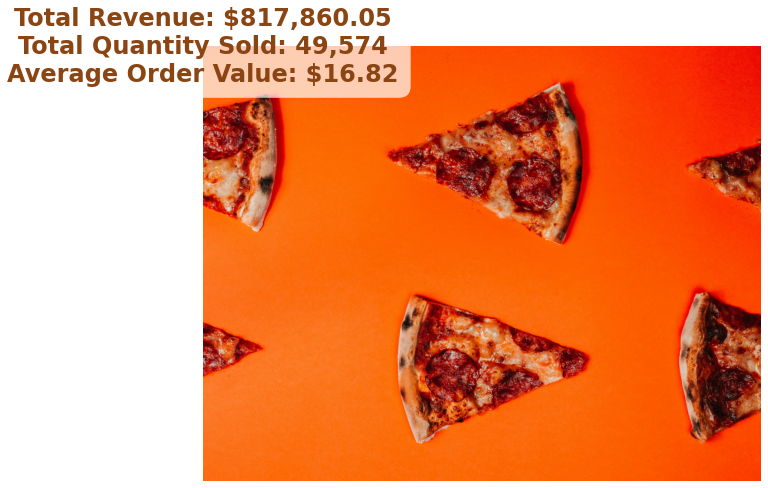

In [6]:
# Run the SQL query to get the total revenue, total quantity sold, and average order value
value = %sql SELECT ROUND(SUM(total_price), 2) AS Total_Revenue, \
                    ROUND(SUM(quantity), 2) AS Total_Quantity_Sold, \
                    ROUND(AVG(total_price), 2) AS Average_Order_Value  \
                    FROM PIZZA_SALES;

total_revenue, total_quantity_sold, average_order_value = value[0]

text_str = f"Total Revenue: ${total_revenue:,.2f}\nTotal Quantity Sold: {total_quantity_sold:,.0f}\nAverage Order Value: ${average_order_value:,.2f}"

# Download a pizza-themed background image
url = "https://unsplash.com/photos/XLmhRnV8yuc/download?ixid=M3wxMjA3fDB8MXxzZWFyY2h8Mjd8fHBpenphfGVufDB8fHx8MTcyNjIyNTQyNnww&force=true"
background = Image.open(urllib.request.urlopen(url))

# Create a plot with the pizza-themed background
fig, ax = plt.subplots(figsize=(10, 8))

# Display the background image
ax.imshow(background, aspect='auto')
plt.axis('off')

# Display the text with custom formatting
plt.text(0.5, 0.5, text_str, ha='center', va='center', fontsize=24, color='#8B4513', fontweight='bold', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

plt.show()



### 2. Revenue by Pizza Category: Analyze revenue split.

In [30]:
result = %sql SELECT pizza_category, ROUND(SUM(total_price), 2) AS category_revenue \
              FROM PIZZA_SALES \
              GROUP BY pizza_category \
              ORDER BY category_revenue DESC;

df = result.DataFrame()

fig = px.pie(df, 
             names='pizza_category',
             values='category_revenue', 
             title='Revenue by Pizza Category',
             template=custom_template,
             color_discrete_sequence=bar_colors)

fig.update_traces(hovertemplate='<b>%{label}</b><br>Revenue: %{value:.2f}<extra></extra>',
                  textposition='inside',
                  marker_line_color='#8B4513',  
                  marker_line_width=1.5)

fig.show()





 * sqlite:///example.db
Done.


### 3. Revenue by Pizza Size: Analyze which pizza size contributes the most to revenue.

In [8]:
result = %sql SELECT pizza_size, SUM(total_price) AS size_revenue \
              FROM PIZZA_SALES \
              GROUP BY pizza_size \
              ORDER BY size_revenue DESC;
df = result.DataFrame()

fig = px.bar(df, 
             x='pizza_size', 
             y='size_revenue', 
             title='Revenue by Pizza Size',
             color='size_revenue',  
             template= custom_template
             )
fig.update_layout(showlegend=False)

fig.show()




 * sqlite:///example.db
Done.


### 4. Top Selling Pizzas: Identify which pizza names generate the highest sales.

In [9]:
result = %sql SELECT pizza_name, SUM(quantity) AS Total_quantity_sold, SUM(total_price) AS Total_revenue_generated \
              FROM PIZZA_SALES \
              GROUP BY Pizza_name \
              ORDER BY Total_quantity_sold DESC, Total_revenue_generated DESC \
              LIMIT 10;
df = result.DataFrame()

fig = px.bar(df, 
             x='Total_quantity_sold', 
             y='pizza_name', 
             title='Top 10 Pizzas by Quantity Sold',
             text='Total_quantity_sold',  # Display quantity values on the bars
             template=custom_template,
             color_discrete_sequence=bar_colors)

fig.update_traces(textposition='outside')

# Adjust layout to ensure y-axis labels are fully visible
fig.update_layout(
    margin=dict(l=250, r=50, t=60, b=50),  
    yaxis_title_font_size=16, 
    yaxis_tickfont_size=14, 
    yaxis_tickangle=0
)

fig.update_layout(showlegend=False)
fig.show()


 * sqlite:///example.db
Done.


### 5. Revenue by Date: Identify peak sales periods (weekly, monthly)

#### A. Weekly

In [10]:
data = %sql SELECT \
    CASE strftime('%w', substr(order_date, 7, 4) || '-' || substr(order_date, 4, 2) || '-' || substr(order_date, 1, 2)) \
        WHEN '0' THEN 'Sunday' \
        WHEN '1' THEN 'Monday' \
        WHEN '2' THEN 'Tuesday' \
        WHEN '3' THEN 'Wednesday' \
        WHEN '4' THEN 'Thursday' \
        WHEN '5' THEN 'Friday' \
        WHEN '6' THEN 'Saturday' \
    END AS weekday_name, \
    ROUND(SUM(total_price), 2) AS total_revenue \
FROM PIZZA_SALES \
GROUP BY strftime('%w', substr(order_date, 7, 4) || '-' || substr(order_date, 4, 2) || '-' || substr(order_date, 1, 2)) \
ORDER BY total_revenue DESC;
df = pd.DataFrame(data, columns=['weekday_name', 'total_revenue'])


fig = px.bar(df, 
             x='weekday_name', 
             y='total_revenue', 
             title='Total Revenue by weekday',
             labels={'weekday_name': 'Weekday', 'total_revenue': 'Total Revenue'},
             text_auto=True,
             template=custom_template,
             color_discrete_sequence=bar_colors)                  
fig.update_traces(textposition='outside')

# Update traces to position text outside bars
fig.update_traces(textposition='outside')

# Update layout to format x-axis and y-axis
fig.update_layout(
    xaxis_title='Weekday',
    yaxis_title='Total Revenue',
    yaxis_tickformat='.2f',  # Format y-axis as currency
    xaxis=dict(
        categoryorder='array',
        categoryarray=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    ),  # Ensure months are displayed in correct order
    margin=dict(l=100, r=20, t=60, b=80)  # Adjust margins to fit labels
)

fig.show()


 * sqlite:///example.db
Done.


#### B. Monthly

In [11]:
data = %sql SELECT \
    CASE strftime('%m', substr(order_date, 7, 4) || '-' || substr(order_date, 4, 2) || '-' || substr(order_date, 1, 2)) \
        WHEN '01' THEN 'January' \
        WHEN '02' THEN 'February' \
        WHEN '03' THEN 'March' \
        WHEN '04' THEN 'April' \
        WHEN '05' THEN 'May' \
        WHEN '06' THEN 'June' \
        WHEN '07' THEN 'July' \
        WHEN '08' THEN 'August' \
        WHEN '09' THEN 'September' \
        WHEN '10' THEN 'October' \
        WHEN '11' THEN 'November' \
        WHEN '12' THEN 'December' \
    END AS month_name, \
    ROUND(SUM(total_price), 2) AS total_revenue \
FROM PIZZA_SALES \
GROUP BY strftime('%m', substr(order_date, 7, 4) || '-' || substr(order_date, 4, 2) || '-' || substr(order_date, 1, 2)) \
ORDER BY total_revenue DESC;

df = pd.DataFrame(data, columns=['month_name', 'total_revenue'])


fig = px.bar(df, 
             x='month_name', 
             y='total_revenue', 
             title='Total Revenue by Month',
             labels={'month_name': 'Month', 'total_revenue': 'Total Revenue'},
             text_auto=True,
             template=custom_template,
             color_discrete_sequence=bar_colors)                  
fig.update_traces(textposition='outside')

# Update traces to position text outside bars
fig.update_traces(textposition='outside')

# Update layout to format x-axis and y-axis
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Total Revenue',
    yaxis_tickformat='.2f',  # Format y-axis as currency
    xaxis=dict(
        categoryorder='array',
        categoryarray=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    ),  # Ensure months are displayed in correct order
    margin=dict(l=100, r=20, t=60, b=80)  # Adjust margins to fit labels
)

fig.show()




 * sqlite:///example.db
Done.


### 6. Revenue by Time: Analyze the time of day when sales are highest.

In [12]:
data = %sql SELECT \
    strftime('%H', order_time) AS hour_of_day, \
    ROUND(SUM(total_price), 2) AS hourly_revenue \
FROM PIZZA_SALES \
GROUP BY hour_of_day \
ORDER BY hourly_revenue DESC;

df = pd.DataFrame(data, columns=['hour_of_day', 'hourly_revenue'])

fig = px.bar(df, 
             y='hour_of_day', 
             x='hourly_revenue', 
             title='Hourly Revenue Distribution',
             labels={'hour_of_day':'Hour of Day', 'hourly_revenue':'Hourly Revenue'},
             text_auto=True,  
             template=custom_template,
             color_discrete_sequence=bar_colors,
             orientation='h')                  

fig.update_traces(textposition='outside')


fig.update_layout(
    xaxis_title='Hourly Revenue',
    yaxis_title='Hour of Day',
    yaxis=dict(categoryorder='total ascending'), 
    margin=dict(l=100, r=50, t=60, b=50) 
)

fig.show()


 * sqlite:///example.db
Done.


### 7. Total Pizzas Ordered During Peak Hours

In [13]:
result = %sql SELECT strftime('%H', order_time) AS hour_of_day, \
    SUM(quantity) AS total_pizzas FROM PIZZA_SALES \
    WHERE strftime('%H', order_time) IN ('12', '13', '17', '18') \
    GROUP BY hour_of_day \
    ORDER BY hour_of_day;
df = result.DataFrame()


fig = px.bar(df, 
             x='hour_of_day', 
             y='total_pizzas', 
             title='Total Pizzas Ordered During Peak Hours',
             template=custom_template, 
             color_discrete_sequence=bar_colors) 

fig.update_traces(text=df['total_pizzas'], textposition='outside')

# Customize layout for better readability
fig.update_layout(
    xaxis_title='Hour of Day',
    yaxis_title='Total Pizzas Ordered',
    xaxis=dict(
        tickmode='array',
        tickvals=['12', '13', '17', '18'],
        ticktext=['12 PM', '1 PM', '5 PM', '6 PM'] # provide labels for better readability
    )
)

fig.show()

 * sqlite:///example.db
Done.


### 8. Top 3 Pizzas Ordered During Peak Hours

In [14]:
query = """
WITH PizzaSales AS (
    SELECT 
        pizza_name,
        strftime('%H', order_time) AS hour_of_day,
        SUM(quantity) AS total_pizzas
    FROM 
        PIZZA_SALES
    WHERE 
        strftime('%H', order_time) IN ('12', '13', '17', '18')
    GROUP BY 
        pizza_name, hour_of_day
),
RankedPizzas AS (
    SELECT
        pizza_name,
        hour_of_day,
        total_pizzas,
        (SELECT COUNT(*) + 1
         FROM PizzaSales AS ps2
         WHERE ps2.hour_of_day = ps1.hour_of_day
           AND ps2.total_pizzas > ps1.total_pizzas) AS rank
    FROM 
        PizzaSales AS ps1
)
SELECT
    hour_of_day,
    pizza_name,
    total_pizzas
FROM
    RankedPizzas
WHERE
    rank <= 3
ORDER BY
    hour_of_day,
    rank;
"""

# Execute the query
result = %sql $query

df = result.DataFrame()

fig = px.bar(df, 
             x='hour_of_day', 
             y='total_pizzas', 
             color='pizza_name',
             title='Top 3 Pizzas Ordered During Peak Hours',
             template=custom_template,  
             color_discrete_sequence=bar_colors,  
             barmode='group') 

fig.update_traces(
    text=df['total_pizzas'], 
    textposition='outside',
    texttemplate='%{text:.0f}', 
    textfont=dict(size=20, family='Arial, sans-serif', color='black', weight='bold')  # Increase size and make bold
)

# Customize layout for better readability
fig.update_layout(
    xaxis_title='Hour of Day',
    yaxis_title='Total Pizzas Ordered',
    xaxis=dict(
        tickmode='array',  # Ensure that x-axis only displays the peak hours
        tickvals=['12', '13', '17', '18'],  # Specify the hours to display
        ticktext=['12 PM', '1 PM', '5 PM', '6 PM'],  # Optional: readable labels
        tickangle=-45,  # Rotate x-axis labels
        title_font_size=14,  # Increase font size for axis title
        tickfont_size=12  # Increase font size for tick labels
    ),
    yaxis=dict(
        title_font_size=14,  # Increase font size for axis title
        tickfont_size=12  # Increase font size for tick labels
    ),
    legend_title='Pizza Name',
    autosize=True,  # Automatically adjust size to fit labels
    margin=dict(l=100, r=20, t=40, b=100)  # Adjust margins to fit labels
)

# Show the plot
fig.show()

 * sqlite:///example.db
Done.


# 2. Customer Behavior Analysis

### 1. Popular Order Combinations: Identify which pizzas are often ordered together

In [15]:
df = %sql SELECT o1.pizza_name AS PIZZA1, \
                   o2.pizza_name AS PIZZA2, \
                   COUNT(*) AS times_ordered_together \
            FROM PIZZA_SALES o1 \
            JOIN PIZZA_SALES o2 \
            ON o1.order_id = o2.order_id \
            AND o1.pizza_name < o2.pizza_name \
            GROUP BY PIZZA1, PIZZA2 \
            ORDER BY times_ordered_together DESC \
            LIMIT 10;

df = pd.DataFrame(df)

fig = go.Figure(data=[go.Bar(
    y=[f'{row["PIZZA1"]} & {row["PIZZA2"]}' for idx, row in df.iterrows()],
    x=df['times_ordered_together'],
    orientation='h',
    text=df['times_ordered_together'],
    textposition='outside',
    marker=dict(color= '#FF5722')  
)])

fig.update_layout(
    title='Top 10 Pizza Pairs Ordered Together',
    xaxis_title='Times Ordered Together',
    yaxis_title='Pizza Pairs',
    template=custom_template 
)

fig.show()


 * sqlite:///example.db
Done.


# 3. Product Preference Analysis

### 1. Popular Pizza Ingredients: Analyze the most common ingredients in top-selling pizzas

In [16]:
top_selling_pizzas = %sql SELECT pizza_name, \
                               SUM(quantity) AS total_quantity_sold \
                        FROM PIZZA_SALES \
                        GROUP BY pizza_name \
                        ORDER BY total_quantity_sold DESC \
                        LIMIT 10
# Run the SQL query analyzing ingredients in top-selling pizzas
results = %sql WITH TopSellingPizzas AS (\
    SELECT pizza_name, \
           SUM(quantity) AS total_quantity_sold \
    FROM PIZZA_SALES \
    GROUP BY pizza_name \
    ORDER BY total_quantity_sold DESC \
    LIMIT 10 \
) \
SELECT o.pizza_ingredients AS Ingredient, \
       COUNT(*) AS Frequency \
FROM PIZZA_SALES o \
JOIN TopSellingPizzas tsp \
    ON o.pizza_name = tsp.pizza_name \
GROUP BY Ingredient \
ORDER BY Frequency DESC;


 * sqlite:///example.db
Done.
 * sqlite:///example.db
Done.


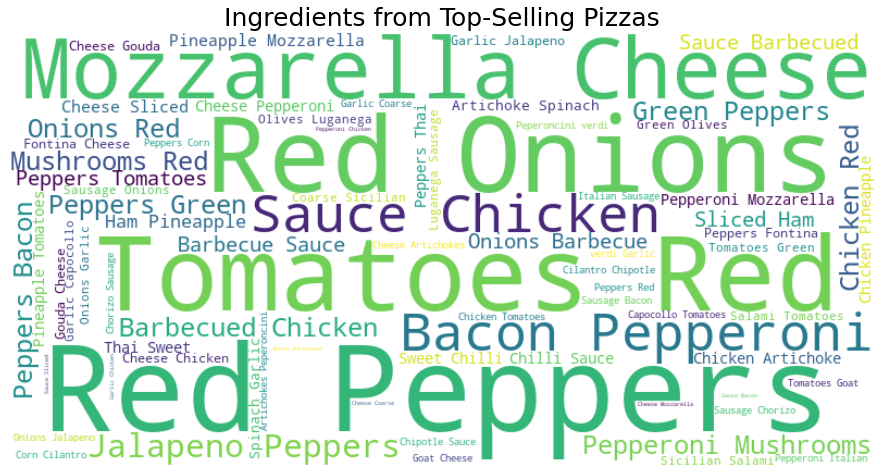

In [17]:
df = results.DataFrame()
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Prepare text for word cloud
text = ' '.join([f"{ingredient} " * freq for ingredient, freq in zip(df['Ingredient'], df['Frequency'])])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plotting
plt.figure(figsize=(18, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Ingredients from Top-Selling Pizzas',fontsize=25) 
plt.show()



### 2. Pizza Size Preference: Determine which pizza sizes are most popular among customers.

In [18]:
result = %sql SELECT pizza_size, \
    COUNT(order_id) AS total_orders \
FROM PIZZA_SALES \
GROUP BY pizza_size \
ORDER BY total_orders DESC;
df = result.DataFrame()
fig = px.bar(df, x='pizza_size', 
             y='total_orders', title='Pizza Size Preference',
             template=custom_template,
             color_discrete_sequence=bar_colors)
fig.update_traces(text=df['total_orders'], textposition='outside')
fig.show()


 * sqlite:///example.db
Done.


### 4. Popular Pizza Ingredients and Their Frequency

In [19]:
result = %sql SELECT pizza_ingredients, pizza_name, \
                   COUNT(*) AS Frequency FROM \
                   PIZZA_SALES GROUP BY \
                   pizza_ingredients, \
                   pizza_name ORDER BY Frequency DESC LIMIT 10; 

df = result.DataFrame()

# Define pizza-themed colors
header_fill_color = 'lightgoldenrodyellow'  
cell_fill_color = 'peachpuff' 
line_color = 'saddlebrown'

# Create the table
fig = go.Figure(data=[go.Table(
    header=dict(
        values=['<b>Pizza Ingredients</b>', '<b>Pizza Name</b>', '<b>Frequency</b>'],
        line_color=line_color,
        fill_color=header_fill_color,
        align='left',
        font=dict(color='black', size=12)
    ),
    cells=dict(
        values=[df['pizza_ingredients'], df['pizza_name'], df['Frequency']],
        line_color=line_color,
        fill_color=cell_fill_color,
        align='left',
        font=dict(color='black', size=11)
    )
)])

# Apply custom template
fig.update_layout(template=custom_template,  # Apply custom theme
                  title_text='Popular Pizza Ingredients and Their Frequency',  # Add title
                  title_font=dict(size=16, color='black'))  # Customize title font size and color

# Adjust layout dimensions
fig.update_layout(width=1000, height=600)

fig.show()



 * sqlite:///example.db
Done.


### 5. Ingredient Combinations: Understand which ingredient combinations are most preferred.

In [20]:
result = %sql WITH IngredientPairs AS (SELECT \
        TRIM(SUBSTR(ingredient_pair, 1, INSTR(ingredient_pair, ',') - 1)) AS Ingredient_1, \
        TRIM(SUBSTR(ingredient_pair, INSTR(ingredient_pair, ',') + 1)) AS Ingredient_2 \
    FROM ( \
        SELECT  \
            pizza_name, \
            REPLACE(pizza_ingredients, ',', ', ') AS ingredient_pair \
        FROM \
            PIZZA_SALES \
    ) \
    WHERE \
        INSTR(ingredient_pair, ',') > 0 \
) \
SELECT \
    Ingredient_1, \
    Ingredient_2, \
    COUNT(*) AS Frequency \
FROM  \
    IngredientPairs \
GROUP BY  \
    Ingredient_1, Ingredient_2 \
ORDER BY \
    Frequency DESC; 

df = result.DataFrame()


header_fill_color = 'lightgoldenrodyellow' 
cell_fill_color = 'peachpuff'  
line_color = 'saddlebrown' 

# Create the table
fig = go.Figure(data=[go.Table(
    header=dict(
        values=['<b>Ingredient 1</b>', '<b>Ingredient 2</b>', '<b>Frequency</b>'],
        line_color=line_color,
        fill_color=header_fill_color,
        align='left',
        font=dict(color='black', size=12)
    ),
    cells=dict(
        values=[df['Ingredient_1'], df['Ingredient_2'], df['Frequency']],
        line_color=line_color,
        fill_color=cell_fill_color,
        align='left',
        font=dict(color='black', size=11)
    )
)])

# Apply custom template
fig.update_layout(template=custom_template, 
                  title_text='Ingredient Combinations', 
                  title_font=dict(size=16, color='black')) 

# Adjust layout dimensions
fig.update_layout(width=1000, height=600)

# Show the table
fig.show()


 * sqlite:///example.db
Done.


# 4. Pricing Analysis

### 1. Price Sensitivity: Determine if there's a correlation between pizza prices and the quantity sold.

In [21]:
results = %sql SELECT CASE WHEN unit_price < 10  THEN 'below 10' \
                           WHEN unit_price >= 10 AND unit_price < 15 THEN '10-15' \
                           WHEN unit_price >= 15 AND unit_price < 20 THEN '15-20' \
                           WHEN unit_price >= 20 AND unit_price < 25 THEN '20-25' \
                           WHEN unit_price >= 25 AND unit_price < 30 THEN '25-30' \
                           WHEN unit_price >= 30 AND unit_price < 35 THEN '30-35' \
                           ELSE 'above 35' \
                      END AS price_range, \
                      SUM(total_quantity_sold) AS total_quantity_sold \
                      FROM ( \
                           SELECT unit_price, SUM(quantity) AS total_quantity_sold \
                           FROM PIZZA_SALES \
                           GROUP BY unit_price \
                      ) AS subquery \
                      GROUP BY price_range \
                      ORDER BY price_range ASC;


df = results.DataFrame()

fig = px.bar(df, x='price_range', y='total_quantity_sold', 
             title='Total Quantity Sold by Price Range',
             labels={'price_range': 'Price Range', 'total_quantity_sold': 'Total Quantity Sold'},
             color='total_quantity_sold', 
             color_continuous_scale='Viridis',  
             template=custom_template, 
             color_discrete_sequence=bar_colors) 

fig.show()


 * sqlite:///example.db
Done.


### 2. Analyze Sales Trends Over Time

In [22]:
results = %sql SELECT order_date, \
    ROUND(SUM(total_price), 2) AS daily_revenue \
FROM PIZZA_SALES \
GROUP BY order_date \
ORDER BY daily_revenue DESC;


df = results.DataFrame()

# Ensure the 'order_date' is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y')

# Sort the DataFrame by date to create a meaningful time series plot
df = df.sort_values('order_date')

# Create an interactive line plot with Plotly
fig = px.line(df, x='order_date', y='daily_revenue', 
              title='Daily Revenue Over Time',
              labels={'order_date': 'Order Date', 'daily_revenue': 'Daily Revenue'},
              markers=True,
              template=custom_template)

# Update line and point colors to match pizza theme
fig.update_traces(line=dict(color='brown'),  
                  marker=dict(color='gold')) 

fig.show()


 * sqlite:///example.db
Done.


### 3. Price Elasticity by Pizza Category

In [23]:
result = %sql SELECT pizza_category,unit_price, \
         SUM(quantity) AS total_quantity_sold, \
         ROUND(SUM(total_price),2) AS total_revenue \
         FROM PIZZA_SALES \
         GROUP BY pizza_category, unit_price \
         ORDER BY pizza_category,total_revenue desc ;

df = result.DataFrame()

header_fill_color = 'lightgoldenrodyellow'  
cell_fill_color = 'peachpuff' 
line_color = 'saddlebrown' 

# Create the table
fig = go.Figure(data=[go.Table(
    header=dict(
        values=['<b>pizza_category</b>', '<b>unit_price</b>', '<b>total_quantity_sold</b>','<b>total_revenue</b>'],
        line_color=line_color,
        fill_color=header_fill_color,
        align='left',
        font=dict(color='black', size=12)
    ),
    cells=dict(
        values=[df['pizza_category'], df['unit_price'], df['total_quantity_sold'],df['total_revenue']],
        line_color=line_color,
        fill_color=cell_fill_color,
        align='left',
        font=dict(color='black', size=11)
    )
)])

# Apply custom template
fig.update_layout(template=custom_template,  # Apply custom theme
                  title_text='Price Elasticity by Pizza Category',  # Add title
                  title_font=dict(size=16, color='black'))  # Customize title font size and color

fig.update_layout(width=1000, height=600)

fig.show()



 * sqlite:///example.db
Done.


### 4. Revenue Contribution by Top 10 Pizzas

In [24]:
results = %sql SELECT pizza_name, \
                      ROUND(SUM(total_price), 2) AS Total_revenue, \
                      RANK() OVER (ORDER BY SUM(total_price) DESC) AS Revenue_rank \
               FROM PIZZA_SALES \
               GROUP BY pizza_name \
               ORDER BY revenue_rank \
               LIMIT 10;

df = results.DataFrame()


header_fill_color = 'lightgoldenrodyellow'  
cell_fill_color = 'peachpuff'  
line_color = 'saddlebrown' 

# Create the table using Plotly
fig = go.Figure(data=[go.Table(
    header=dict(
        values=['<b>Revenue Rank</b>', '<b>Pizza Name</b>', '<b>Total Revenue</b>'],
        line_color=line_color,
        fill_color=header_fill_color,
        align='center',
        font=dict(color='black', size=20),
        height=40 
    ),
    cells=dict(
        values=[df['Revenue_rank'], df['pizza_name'], df['Total_revenue']],
        line_color=line_color,
        fill_color=cell_fill_color,
        align='center',
        font=dict(color='black', size=18),  # Increase cell font size
        height=30  # Increase cell height
    )
)])

# Apply custom template and adjust layout
fig.update_layout(template=custom_template,
                  title_text='Top 10 Pizzas by Revenue Contribution', 
                  title_font=dict(size=24, color='black'), 
                  width=1000, 
                  height=600) 
fig.show()



 * sqlite:///example.db
Done.


### 5. Bottom 10 Lowest Revenue-Generating Pizzas

In [25]:
results = %sql SELECT pizza_name AS Pizza_name, \
                      ROUND(SUM(total_price), 2) AS Total_revenue, \
                      RANK() OVER (ORDER BY SUM(total_price) ASC) AS Revenue_rank \
               FROM PIZZA_SALES \
               GROUP BY pizza_name \
               ORDER BY Revenue_rank \
               LIMIT 10;

df = results.DataFrame()


header_fill_color = 'lightgoldenrodyellow' 
cell_fill_color = 'peachpuff'
line_color = 'saddlebrown'

# Create the table using Plotly
fig = go.Figure(data=[go.Table(
    header=dict(
        values=['<b>Revenue Rank</b>', '<b>Pizza Name</b>', '<b>Total Revenue</b>'],
        line_color=line_color,
        fill_color=header_fill_color,
        align='center',
        font=dict(color='black', size=20),  # Increase font size
        height=40  # Increase header height
    ),
    cells=dict(
        values=[df['Revenue_rank'], df['Pizza_name'], df['Total_revenue']],
        line_color=line_color,
        fill_color=cell_fill_color,
        align='center',
        font=dict(color='black', size=18),  # Increase cell font size
        height=30  # Increase cell height
    )
)])

# Apply custom template and adjust layout
fig.update_layout(template=custom_template, 
                  title_text='Bottom 10 Lowest by Revenue Contribution', 
                  title_font=dict(size=24, color='black'), 
                  width=1000, 
                  height=600)

fig.show()



 * sqlite:///example.db
Done.


### 6. Top 10 Pizzas by Order Count

In [26]:
result = %sql SELECT pizza_name_id, \
                    COUNT(*) AS order_count \
             FROM PIZZA_SALES \
             GROUP BY pizza_name_id \
             ORDER BY order_count DESC \
             LIMIT 10;

df = result.DataFrame()

fig = px.bar(df, 
             x='pizza_name_id', 
             y='order_count', 
             title='Top 10 Pizzas by Order Count',
             template=custom_template, 
             color_discrete_sequence=bar_colors) 

fig.update_traces(text=df['order_count'], textposition='outside')

fig.update_layout(
    xaxis_title='Pizza Name ID',
    yaxis_title='Order Count',
    xaxis_tickangle=-45  # Rotate x-axis labels if needed
)

fig.show()



 * sqlite:///example.db
Done.


### 7. Bottom 10 Pizzas by Order Count

In [27]:
result = %sql SELECT pizza_name_id, \
                    COUNT(*) AS order_count \
             FROM PIZZA_SALES \
             GROUP BY pizza_name_id \
             ORDER BY order_count ASC \
             LIMIT 10;
df = result.DataFrame()


fig = px.bar(df, 
             x='pizza_name_id', 
             y='order_count', 
             title='Bottom 10 Pizzas by Order Count',
             template=custom_template, 
             color_discrete_sequence=bar_colors) 


fig.update_traces(text=df['order_count'], textposition='outside')


fig.update_layout(
    xaxis_title='Pizza Name ID',
    yaxis_title='Order Count',
    xaxis_tickangle=-45  # Rotate x-axis labels 
)

fig.show()

 * sqlite:///example.db
Done.


<div style="background-color:#ffefd5; padding:20px; border-radius:10px;">
  <h2 style="color:#ff6347; text-align:center;">🍕 Plato's Pizza Challenge 🍕</h2>

  Welcome aboard! At Plato's Pizza, we’re glad to have you on the team to help us improve our operations with data-driven insights. Here’s what we’d like your expertise on:

  ---

  ### 1. Overall Performance Summary 🍕📊
  - **💰 Total Revenue:** $817,860.05
  - **🍕 Total Quantity Sold:** 49,574 pizzas
  - **💸 Average Order Value:** $16.82

  > **Key Insight:** The average order value is about `$16.82`, showing that customers typically spend around this amount per transaction. With nearly `50k pizzas` sold, this indicates a balanced mix of high and low-priced pizzas.

  ---

  ### 2. Revenue by Pizza Category 🍕🍗🍅
  - **Top Category:** Classic ($220,053.10)
  - **Lowest Revenue Category:** Veggie ($193,690.45)

  > **Key Insight:** The Classic and Supreme categories are the most popular, generating over `$200k` each. Consider promotions for the Veggie category to improve its performance.

  ---

  ### 3. Revenue by Pizza Size 📏🍕
  - **Top Pizza Size by Revenue:** Large (L) ($375,318.70)
  - **Lowest Size by Revenue:** XXL ($1,006.60)

  > **Key Insight:** Customers overwhelmingly prefer `Large` and `Medium` pizzas, while `XXL` pizzas are unpopular. Reevaluate the XXL size offering to see if it's worth keeping on the menu.

  ---

  ### 4. Top 10 Best-Selling Pizzas 🍕💸
  - **Top Pizza by Quantity Sold:** The Classic Deluxe Pizza (2,453 units)
  - **Top Revenue-Generating Pizza:** The Thai Chicken Pizza ($43,434.25)

  > **Key Insight:** Though `The Classic Deluxe Pizza` leads in quantity, higher-priced options like `The Thai Chicken Pizza` generate more revenue. Focusing on upselling premium pizzas could be beneficial.

  ---

  ### 5. Day of the Week Performance 📅
  - **Top Day by Revenue:** Friday ($136,073.90)
  - **Lowest Revenue Day:** Sunday ($99,203.50)

  > **Key Insight:** Fridays are the busiest days, likely due to weekend celebrations, while Sundays lag behind. Introducing Sunday deals could boost sales on slower days.

  ---

  ### 6. Monthly Sales Performance 📅💸
  - **Top Performing Month:** July ($72,557.90)
  - **Lowest Performing Month:** October ($64,027.60)

  > **Key Insight:** July sees peak performance, possibly due to summer breaks. Lower-performing months like October could benefit from seasonal promotions.

  ---

  ### 7. Hourly Sales Distribution ⏰🍕
  - **Top Revenue Hour:** 12:00 PM ($111,877.90)
  - **Lowest Revenue Hour:** 9:00 AM ($83.00)

  > **Key Insight:** Lunchtime is the peak sales time, with minimal activity in the early morning hours. Focus on improving staffing and inventory during peak periods (12 PM - 1 PM).

  ---

  ### 8. Peak Hour Pizza Production ⏲️🍽️
  - **Peak Hour:** 12 PM (6,776 pizzas sold)

  > **Key Insight:** Noon sees the highest pizza production, so optimizing preparation and ingredient supply during this period is critical to handle the rush.

  ---

  ### 9. Popular Order Combinations 🍕🍕
  - **Most Common Pair:** Hawaiian & Thai Chicken (319 orders)

  > **Key Insight:** Hawaiian and Thai Chicken pizzas are often ordered together, presenting an opportunity for combo deals or promotions to encourage even more sales.

  ---

  ### 10. Top Ingredients in Best-Selling Pizzas 🌶️🍗
  - **Most Common Ingredient:** Pepperoni

  > **Key Insight:** Popular ingredients like pepperoni and chicken should always be well-stocked to avoid shortages, especially during peak sales times.

  ---

  ### 11. Pizza Size Preferences 📏🍕
  - **Top Size by Order Count:** Large (L) (18,526 orders)

  > **Key Insight:** Customers love the `Large` size, which makes up the majority of orders. Promotions or discounts on large pizzas may drive even more sales.

  ---

  ### 12. Ingredient Combinations 🧀🍅
  - **Most Popular Ingredient Pairing:** Pepperoni and Mushrooms, Red Onions, Red Peppers, Bacon (2,416 occurrences)

  > **Key Insight:** Certain ingredient combinations, like pepperoni and mushrooms, are consistently popular. New pizzas with similar profiles may perform well.

  ---

  ### 13. Price Sensitivity Analysis 💸🍕
  - **Most Popular Price Range:** $15-20 (17,986 pizzas sold)

  > **Key Insight:** The sweet spot for pricing is between `$15-20`. Future pricing strategies should stay in this range to maximize customer demand.

  ---

  ### 14. Price Elasticity by Category 💸📈
  - **Top Revenue Pizza Category:** Chicken (Unit price: $20.75, Total Revenue: $102,339.00)

  > **Key Insight:** The Chicken category is performing well even with a higher price point. Pricing adjustments may be beneficial in other categories where demand is strong.

  ---

  ### 15. Revenue Contribution by Top 10 Pizzas 🍕💰
  - **Top Pizza by Revenue:** The Thai Chicken Pizza ($43,434.25)

  > **Key Insight:** The top 10 pizzas drive the bulk of the revenue. Focus on marketing these pizzas to keep sales strong.

  ---

  ### 16. Bottom 10 Lowest Revenue-Generating Pizzas 📉🍕
  - **Lowest Pizza by Revenue:** The Brie Carre Pizza ($11,588.50)

  > **Key Insight:** The bottom 10 pizzas contribute minimally to total revenue. These pizzas may need to be rebranded, promoted differently, or removed from the menu.

  ---

  ### 17. Top and Bottom 10 Pizzas by Order Count 🍕🍽️
  - **Top Pizza by Order Count:** Big Meat (1,811 orders)
  - **Bottom Pizza by Order Count:** The Greek XXL (28 orders)

  > **Key Insight:** Big Meat, Thai Chicken, and Five Cheese are customer favorites, while pizzas like The Greek XXL struggle to gain traction. Consider removing underperforming pizzas to streamline the menu.

  ---

  ### Actionable Recommendations 📊
  - **Promotional Focus:** Focus on high-performing pizzas like Thai Chicken and Classic Deluxe in marketing campaigns.
  - **Price Strategy:** Keep most pizzas within the $15-20 range to maximize sales.
  - **Boosting Low Sales Days:** Offer special promotions on Sundays and during slower morning hours to increase sales.
  - **Operational Efficiency:** Optimize staffing and inventory during peak times (12 PM and 5-6 PM).
  - **Menu Optimization:** Consider removing or reworking low-selling pizzas like the Greek XXL.

  ---

</div>
